# Feature Encoding


## 1. Ordinal Encoding
It is for ordinal categorical data

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/customer (1).csv').drop(columns=['age','gender'])
df.sample(5)

,review,education,purchased
49,Good,UG,No
7,Poor,School,Yes
26,Poor,PG,No
3,Good,PG,No
16,Poor,UG,Yes


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(df.iloc[:,0:2],df.iloc[:,-1],test_size=0.2)

In [ ]:
X_train.head()

,review,education
31,Poor,School
8,Average,UG
32,Average,UG
28,Poor,School
40,Good,School


In [ ]:
y_train.head()

,purchased
31,Yes
8,No
32,Yes
28,No
40,No


In [ ]:
or_encod= OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']])  # We specify the category to control the number assigned to each category. Here poor will get 0 and good will get 2. If we keep it auto number assigning  will be random.

In [ ]:
X_train= or_encod.fit_transform(X_train)
X_test= or_encod.transform(X_test)

In [ ]:
X_train

array([[0., 0.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [2., 0.],
       [1., 1.],
       [1., 0.],
       [0., 2.],
       [0., 2.],
       [0., 2.],
       [2., 0.],
       [1., 2.],
       [2., 2.],
       [1., 0.],
       [0., 0.],
       [1., 1.],
       [2., 1.],
       [0., 2.],
       [0., 1.],
       [0., 2.],
       [0., 2.],
       [2., 2.],
       [2., 1.],
       [2., 1.],
       [2., 2.],
       [2., 0.],
       [1., 0.],
       [0., 1.],
       [2., 0.],
       [0., 0.],
       [1., 2.],
       [0., 0.],
       [2., 0.],
       [1., 0.],
       [2., 1.],
       [0., 2.],
       [1., 2.],
       [0., 1.],
       [2., 2.],
       [1., 0.]])

In [ ]:
or_encod.categories_

[array(['Poor', 'Average', 'Good'], dtype=object),
 array(['School', 'UG', 'PG'], dtype=object)]

In [ ]:
or_encod.feature_names_in_

array(['review', 'education'], dtype=object)

In [ ]:
or_encod.n_features_in_

2

In [ ]:
or_encod.get_feature_names_out()

array(['review', 'education'], dtype=object)

In [ ]:
or_encod.inverse_transform(np.array([0,1]).reshape(1,2))

array([['Poor', 'UG']], dtype=object)

In [ ]:
# handle unknown
or_encod.transform(np.array(['Poor','college']).reshape(1,2)) # i don't have category college

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


ValueError: Found unknown categories [np.str_('college')] in column 1 during transform

In [ ]:
# i can set value for unknown value

or_encod= OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']],
                    handle_unknown='use_encoded_value',
                    unknown_value=-1)

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:2], df.iloc[:,-1], test_size=0.2)

X_train =or_encod.fit_transform(X_train)
or_encod.transform(np.array(['Poor','college']).reshape(1,2))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([[ 0., -1.]])

In [ ]:
# handling infrequent categories
X = np.array([['dog'] * 5 + ['cat'] * 20 + ['rabbit'] * 10 +['snake'] * 3 + ['horse'] * 2], dtype=object).T
X

array([['dog'],
       ['dog'],
       ['dog'],
       ['dog'],
       ['dog'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['rabbit'],
       ['rabbit'],
       ['rabbit'],
       ['rabbit'],
       ['rabbit'],
       ['rabbit'],
       ['rabbit'],
       ['rabbit'],
       ['rabbit'],
       ['rabbit'],
       ['snake'],
       ['snake'],
       ['snake'],
       ['horse'],
       ['horse']], dtype=object)

In [ ]:
encoder= OrdinalEncoder(max_categories=3).fit(X) # it will sort categories, encode top 3, and then the remaining categories will be merged and treated as same

In [ ]:
encoder.infrequent_categories_ # here cat and rabbit is top two, so remaninings are infrequent category

[array(['dog', 'horse', 'snake'], dtype=object)]

In [ ]:
encoder.categories_

[array(['cat', 'dog', 'horse', 'rabbit', 'snake'], dtype=object)]

In [ ]:
encoder.transform(np.array([['cat','rabbit','snake','dog','horse']]).reshape(5,1)) # cat and rabbit is treated differently but dog,horse and snake is treated as same,because they are rare.

array([[0.],
       [1.],
       [2.],
       [2.],
       [2.]])

In [ ]:
# this is better one
enc = OrdinalEncoder(min_frequency=4).fit(X)
enc.infrequent_categories_

[array(['horse', 'snake'], dtype=object)]

In [ ]:
encoder.transform(np.array([['cat','rabbit','snake','dog','horse']]).reshape(5,1))

array([[0.],
       [1.],
       [2.],
       [2.],
       [2.]])

In [ ]:
# handling missing data

# Example categorical data with missing values
data = [['Cat'], [np.nan], ['Dog'], ['Fish'], [np.nan]]

In [ ]:
encoder=OrdinalEncoder(encoded_missing_value=np.nan)

In [ ]:
encoder.fit_transform(data)

array([[ 0.],
       [nan],
       [ 1.],
       [ 2.],
       [nan]])

# Lable Encoder
used only in target column

In [ ]:
df.head()

,review,education,purchased
0,Average,School,No
1,Poor,UG,No
2,Good,PG,No
3,Good,PG,No
4,Average,UG,No


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:2], df.iloc[:,-1], test_size=0.2)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
le.fit_transform(y_train)

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0])

In [ ]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [ ]:
le.inverse_transform(np.array([1,0,0,1]))

array(['Yes', 'No', 'No', 'Yes'], dtype=object)

# For Nominal Categorical Data

## 2.OneHotEncoder
one hot encoding

In [ ]:
df=pd.read_csv('/content/cars.csv').drop(columns=['km_driven','owner'])
df.sample(5)

,brand,fuel,selling_price
6299,Maruti,Diesel,380000
3146,Honda,Diesel,500000
2360,Chevrolet,Petrol,130000
1825,Hyundai,Petrol,340000
6352,Chevrolet,Diesel,125000


In [ ]:
df.brand.count()

np.int64(8128)

In [ ]:
df.isnull().sum()

,0
brand,0
fuel,0
selling_price,0


In [ ]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG'], dtype=object)

In [ ]:
X_train['fuel'].nunique()

4

In [ ]:
X_train.brand.nunique()

32

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
oh= OneHotEncoder()

In [ ]:
X_train.shape

(6502, 2)

In [ ]:
# 34 category will turn into 34 column and 4 category will turn into 4 column , so total 36 column. [1,0,0,0,0,0,....36th] this type sparse matrix
oh.fit_transform(X_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 13004 stored elements and shape (6502, 36)>

In [ ]:
oh.fit_transform(X_train).toarray() # this turns the sparse matrix into array

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
oh.fit_transform(X_train).toarray().shape

(6502, 36)

In [ ]:
oh.categories_

[array(['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
        'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
        'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
        'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel',
        'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
        'Volvo'], dtype=object),
 array(['CNG', 'Diesel', 'LPG', 'Petrol'], dtype=object)]

In [ ]:
oh.get_feature_names_out()

array(['brand_Ambassador', 'brand_Ashok', 'brand_Audi', 'brand_BMW',
       'brand_Chevrolet', 'brand_Daewoo', 'brand_Datsun', 'brand_Fiat',
       'brand_Force', 'brand_Ford', 'brand_Honda', 'brand_Hyundai',
       'brand_Isuzu', 'brand_Jaguar', 'brand_Jeep', 'brand_Kia',
       'brand_Land', 'brand_Lexus', 'brand_MG', 'brand_Mahindra',
       'brand_Maruti', 'brand_Mercedes-Benz', 'brand_Mitsubishi',
       'brand_Nissan', 'brand_Opel', 'brand_Peugeot', 'brand_Renault',
       'brand_Skoda', 'brand_Tata', 'brand_Toyota', 'brand_Volkswagen',
       'brand_Volvo', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol'], dtype=object)

In [ ]:
oh.fit_transform(X_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 13004 stored elements and shape (6502, 36)>

In [ ]:
pd.DataFrame(oh.fit_transform(X_train).toarray(),columns=oh.get_feature_names_out())

,brand_Ambassador,brand_Ashok,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,brand_Fiat,brand_Force,brand_Ford,...,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# this gives direct array instead of sparse matrix
oh= OneHotEncoder(sparse_output=False,dtype=np.int32)
oh.fit_transform(X_train)

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int32)

In [ ]:
oh.inverse_transform(np.array([0., 0., 1., 0., 0.,0.,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]).reshape(1,36))

ValueError: Samples [0] can not be inverted when drop=None and handle_unknown='error' because they contain all zeros

In [ ]:
# drop column to reduce ralation between columns, some algorithm is alergic to this type of relation
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

ohe = OneHotEncoder(drop='first',sparse_output=False) # it drops first columns.[0 ,0, 1] can be written as [0, 1 ] also.
ohe.fit_transform(X_train).shape

(6502, 34)

In [ ]:
# handling rare categories
X_train['brand'].value_counts()

,count
brand,
Maruti,1953
Hyundai,1127
Mahindra,635
Tata,586
Toyota,391
Honda,369
Ford,320
Chevrolet,185
Renault,183


In [ ]:
X_train.fuel.value_counts() # cng and lpg are rare

,count
fuel,
Diesel,3545
Petrol,2880
CNG,46
LPG,31


In [ ]:
# using min frequency

oh=OneHotEncoder(sparse_output=False,min_frequency=100)
oh.fit_transform(X_train).shape

(6502, 14)

In [ ]:
oh.get_feature_names_out() # cng and lpg mearged into fuel_infrequent_sklearn, similarly in brand also.

array(['brand_Chevrolet', 'brand_Ford', 'brand_Honda', 'brand_Hyundai',
       'brand_Mahindra', 'brand_Maruti', 'brand_Renault', 'brand_Tata',
       'brand_Toyota', 'brand_Volkswagen', 'brand_infrequent_sklearn',
       'fuel_Diesel', 'fuel_Petrol', 'fuel_infrequent_sklearn'],
      dtype=object)

In [ ]:
# using max_categories
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore', max_categories=15)
ohe.fit_transform(X_train).shape

(6502, 19)

In [ ]:
ohe.get_feature_names_out()

array(['brand_BMW', 'brand_Chevrolet', 'brand_Ford', 'brand_Honda',
       'brand_Hyundai', 'brand_Jaguar', 'brand_Mahindra', 'brand_Maruti',
       'brand_Nissan', 'brand_Renault', 'brand_Skoda', 'brand_Tata',
       'brand_Toyota', 'brand_Volkswagen', 'brand_infrequent_sklearn',
       'fuel_CNG', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol'], dtype=object)

In [ ]:
# how to handle unknown category
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

ohe = OneHotEncoder(drop='first',sparse_output=False)
ohe.fit_transform(X_train)

ohe.transform(np.array(['local','Petrol']).reshape(1,2))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


ValueError: Found unknown categories [np.str_('local')] in column 0 during transform

In [ ]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe.fit_transform(X_train)

ohe.transform(np.array(['local','Petrol']).reshape(1,2))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.]])

In [ ]:
ohe.inverse_transform(np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.]).reshape(1,36))

array([[None, 'Petrol']], dtype=object)

# LabelBinarizer

It is used on target column. It perform onehotencoding on target column. We need it in multiclass logistic regression and softmax in deep learning


In [ ]:
from sklearn.preprocessing import LabelBinarizer

# Sample target variable for a multi-class classification problem
y = ['cat', 'dog', 'fish', 'dog', 'cat']

# Initialize the LabelBinarizer
lb = LabelBinarizer()

# Fit and transform the target variable
y_binarized = lb.fit_transform(y)

print("Binarized labels:\n", y_binarized)

# Inverse transform to recover original labels
y_original = lb.inverse_transform(y_binarized)

print("Original labels:\n", y_original)

Binarized labels:
 [[1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]]
Original labels:
 ['cat' 'dog' 'fish' 'dog' 'cat']


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
# If there exist multi layer target, for example movie genre= Action,Drama and Action,Thriller

# Example multi-label data
y = [('red', 'blue'), ('blue', 'green'), ('green',), ('red',)]

# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the data to binary matrix format
Y = mlb.fit_transform(y)

print("Binary matrix:\n", Y)
print("Class labels:", mlb.classes_)

# Inverse transform to recover original labels
y_inv = mlb.inverse_transform(Y)
print("Inverse transformed labels:", y_inv)


Binary matrix:
 [[1 0 1]
 [1 1 0]
 [0 1 0]
 [0 0 1]]
Class labels: ['blue' 'green' 'red']
Inverse transformed labels: [('blue', 'red'), ('blue', 'green'), ('green',), ('red',)]


#**Count and Frequency Encoding**
1. Count:Each category in a column will be replaced by the count of that       category in the column.
2. Frequecy: Count divided by total number of category

In [1]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.3 MB/s eta 0:00:00


In [2]:
# dataset generation
import pandas as pd
import numpy as np
import category_encoders as ce

# Simulating a dataset
data = {
    'Age': np.random.randint(20, 60, size=100).astype(float),  # Random ages between 20 and 60
    'State': np.random.choice(['Karnataka', 'Tamil Nadu', 'Maharashtra', 'Delhi', 'Telangana'], size=100),
    'Education': np.random.choice(['High School', 'UG', 'PG'], size=100),
    'Package': np.random.rand(100) * 100  # Random package values for demonstration
}

# Introducing missing values in 'Age' column (5%)
np.random.seed(0)  # For reproducibility
missing_indices = np.random.choice(data['Age'].shape[0], replace=False, size=int(data['Age'].shape[0] * 0.05))
data['Age'][missing_indices] = np.nan

df = pd.DataFrame(data)

df.head()

,Age,State,Education,Package
0,35.0,Karnataka,PG,59.179527
1,45.0,Tamil Nadu,PG,59.370124
2,NaN,Maharashtra,High School,11.007851
3,36.0,Delhi,UG,8.134412
4,56.0,Telangana,PG,94.404096


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Package']), df['Package'], test_size=0.2, random_state=42)

In [4]:
X_train.head()

,Age,State,Education
55,NaN,Delhi,PG
88,30.0,Maharashtra,High School
26,NaN,Telangana,UG
42,59.0,Telangana,PG
69,30.0,Maharashtra,UG


In [5]:
X_train['State'].value_counts()

,count
State,
Tamil Nadu,18
Delhi,17
Karnataka,16
Telangana,15
Maharashtra,14


In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import sklearn

In [7]:
class CountEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
        self.count_map = {}

    def fit(self, X, y=None):
        if self.columns is None:
            self.columns = X.columns
        for col in self.columns:
            self.count_map[col] = X[col].value_counts().to_dict()
        return self

    def transform(self, X):
        X = X.copy()
        for col in self.columns:
            X[col] = X[col].map(self.count_map[col]).fillna(0)
        return X

In [8]:
preprocessor = ColumnTransformer(
    transformers=[
        ('age_missing', SimpleImputer(strategy='mean'), ['Age']),
        ('cat_state', CountEncoder(), ['State']),
        ('education_ordinal', OrdinalEncoder(), ['Education'])
    ])

sklearn.set_config(transform_output="pandas")

In [9]:
preprocessor.fit_transform(X_train)

,age_missing__Age,cat_state__State,education_ordinal__Education
55,38.4,17,1.0
88,30.0,14,0.0
26,38.4,15,2.0
42,59.0,15,1.0
69,30.0,14,2.0
...,...,...,...
60,56.0,16,2.0
71,29.0,17,2.0
14,54.0,17,1.0
92,46.0,16,2.0


In [10]:
# using category encoders
from category_encoders.count import CountEncoder

In [11]:
preprocessor = ColumnTransformer(
    transformers=[
        ('age_missing', SimpleImputer(strategy='mean'), ['Age']),
        ('cat_state', CountEncoder(), ['State']),
        ('education_ordinal', OrdinalEncoder(), ['Education'])
    ])
sklearn.set_config(transform_output="pandas")

In [12]:
preprocessor.fit_transform(X_train)

,age_missing__Age,cat_state__State,education_ordinal__Education
55,38.4,17,1.0
88,30.0,14,0.0
26,38.4,15,2.0
42,59.0,15,1.0
69,30.0,14,2.0
...,...,...,...
60,56.0,16,2.0
71,29.0,17,2.0
14,54.0,17,1.0
92,46.0,16,2.0


In [13]:
# normalize =True gives frequency encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('age_missing', SimpleImputer(strategy='mean'), ['Age']),
        ('cat_state', CountEncoder(normalize=True), ['State']),
        ('education_ordinal', OrdinalEncoder(), ['Education'])
    ])
sklearn.set_config(transform_output="pandas")
preprocessor.fit_transform(X_train)

,age_missing__Age,cat_state__State,education_ordinal__Education
55,38.4,0.2125,1.0
88,30.0,0.1750,0.0
26,38.4,0.1875,2.0
42,59.0,0.1875,1.0
69,30.0,0.1750,2.0
...,...,...,...
60,56.0,0.2000,2.0
71,29.0,0.2125,2.0
14,54.0,0.2125,1.0
92,46.0,0.2000,2.0


In [18]:
# parameters of category encoder
import pandas as pd
import numpy as np
import category_encoders as ce

# Simulating a dataset
np.random.seed(42)  # For reproducibility
data = {
    'State': np.random.choice(['Karnataka', 'Tamil Nadu', 'Maharashtra', 'Delhi', 'Telangana', np.nan], size=100),
    'Education': np.random.choice(['High School', 'UG', 'PG', np.nan], size=100)
}
df = pd.DataFrame(data)

df.head(25)


,State,Education
0,Delhi,PG
1,Telangana,High School
2,Maharashtra,High School
3,Telangana,High School
4,Telangana,PG
5,Tamil Nadu,High School
6,Maharashtra,nan
7,Maharashtra,High School
8,Maharashtra,nan
9,Telangana,nan


In [19]:
# Initialize the CountEncoder with various parameters
encoder = ce.CountEncoder(
    cols=['State', 'Education'],  # Specify columns to encode. None would automatically select categorical columns.
    handle_missing='error',  # Treat NaNs as a countable category
    handle_unknown='error',  # Treat unknown categories as NaNs (if seen during transform but not in fit)
)

In [20]:
# Fit and transform the dataset
encoder.fit_transform(df)

#print(encoded_df.head(25))

,State,Education
0,25,34
1,17,27
2,11,27
3,17,27
4,17,34
...,...,...
95,25,27
96,25,16
97,17,23
98,11,23


In [21]:
encoder.mapping

{'State': State
 Delhi          25
 Tamil Nadu     19
 Telangana      17
 nan            17
 Maharashtra    11
 Karnataka      11
 Name: count, dtype: int64,
 'Education': Education
 PG             34
 High School    27
 nan            23
 UG             16
 Name: count, dtype: int64}

In [22]:
np.random.seed(0)  # For reproducibility
data = {
    'Category': np.random.choice(['A', 'B', 'C', 'D', 'E', 'F', np.nan], size=100, p=[0.3, 0.25, 0.15, 0.15, 0.05, 0.05, 0.05]),
    'Value': np.random.rand(100)
}

df = pd.DataFrame(data)

df.sample(10)


,Category,Value
91,C,0.209844
29,B,0.290078
2,C,0.735194
50,C,0.149448
44,C,0.806194
78,A,0.704414
33,C,0.298282
65,B,0.855803
75,A,0.223925
45,C,0.703889


In [23]:
df['Category'].value_counts()

,count
Category,
A,34
B,22
C,21
D,12
nan,5
F,4
E,2


In [25]:
encoder = ce.CountEncoder(
    cols=['Category'],
    min_group_size=5,  # Groups with counts less than 5 will be combined
    min_group_name='Combined',  # Use default naming for combined minimum groups
)

# Fit and transform the dataset
encoded_df = encoder.fit_transform(df['Category'])

# Display the original and encoded data for comparison
df['Encoded'] = encoded_df
print(df.head(20))

   Category     Value  Encoded
0         B  0.677817       22
1         D  0.270008       12
2         C  0.735194       21
3         B  0.962189       22
4         B  0.248753       22
5         C  0.576157       21
6         B  0.592042       22
7         E  0.572252        6
8       nan  0.223082        5
9         B  0.952749       22
10        D  0.447125       12
11        B  0.846409       22
12        C  0.699479       21
13        F  0.297437        6
14        A  0.813798       34
15        A  0.396506       34
16        A  0.881103       34
17        D  0.581273       12
18        D  0.881735       12
19        E  0.692532        6


In [26]:
encoder.mapping

{'Category': Category
 A           34
 B           22
 C           21
 D           12
 nan          5
 Combined     6
 Name: count, dtype: int64}

Disadvantages: Kunu col e duita category er count shoman hole tara to same value pabe, tahole to tara same category hishebe treat hobe (Collision). Abar ekta categoryr countr 50, arekter count 1 amon situation e ami to rare category ke undervalue dicchi...algorithm to 1 ke undervalue dibe(skewed distribution).Eta tree based algo te valo kaj kore, high cardinality data te use kora jay karon eta column baray na. Rare category jehetu pacchi, shehetu imbalance dataset e kaje lagte pare.

**Binary Encoder**

In [27]:
import pandas as pd
import category_encoders as ce

# Sample dataset
data = {
    'Item': ['Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
    'Fruit': ['Apple', 'Banana', 'Cherry', 'Date', 'Elderberry', 'Fig', 'Grape', 'Honeydew']
}
df = pd.DataFrame(data)

df

,Item,Fruit
0,Item1,Apple
1,Item2,Banana
2,Item3,Cherry
3,Item4,Date
4,Item5,Elderberry
5,Item6,Fig
6,Item7,Grape
7,Item8,Honeydew


In [28]:
# Initialize the Binary Encoder
encoder = ce.BinaryEncoder(cols=['Fruit'], return_df=True)

# Fit and transform the data
df_encoded = encoder.fit_transform(df)

# Display the original and encoded data
print(df_encoded)

    Item  Fruit_0  Fruit_1  Fruit_2  Fruit_3
0  Item1        0        0        0        1
1  Item2        0        0        1        0
2  Item3        0        0        1        1
3  Item4        0        1        0        0
4  Item5        0        1        0        1
5  Item6        0        1        1        0
6  Item7        0        1        1        1
7  Item8        1        0        0        0


Binary encoder e first e category gulu ke ekta number assign kora hoy, then oi number ke binary te convert kora hoy. Ete kom feature create hoy. Column e category onek beshi thakle ohe e onek new feature create hoy ja binary te hoy na. kintu shomossha holo interpretability kome jay. Jodi linear reg lagai, fruit_0 er wight to kisu mean korche na, pura row ta mile ekta binary, puro row er meaning ase..kintu ami notun binary column gulate je weight dibo shegulo to kunu meaning dicche na.High cardinality data and tree based model e use kora jay. Linear algorithm gulo te problem korbe. Handling new category is easy. Karon new category ke ekta number assign kore binary kore dilei hobe.

**Target Encoder**

In [29]:
# using category_encoder

import pandas as pd
import category_encoders as ce

# Sample data
data = {
    'Feature': ['A', 'B', 'A', 'B', 'C', 'A', 'B', 'C'],
    'Target': [1, 0, 0, 1, 1, 1, 0, 1]
}
df = pd.DataFrame(data)

# Separating the feature and target columns
X = df.drop('Target', axis=1)
y = df['Target']

# Initialize the TargetEncoder
encoder = ce.TargetEncoder(cols=['Feature'])

# Fit the encoder using the feature data and target variable
encoder.fit(X, y)

# Transform the data
encoded = encoder.transform(X)

# Show the original and encoded data
print(pd.concat([df, encoded], axis=1))


   Feature  Target   Feature
0        A       1  0.631436
1        B       0  0.579948
2        A       0  0.631436
3        B       1  0.579948
4        C       1  0.678194
5        A       1  0.631436
6        B       0  0.579948
7        C       1  0.678194


Target encoder kunu column er each category ke dhorbe, oi category er jonno jotogulo output ase shob output er mean nibe, then oi category take output er mean diye replace korbe. Shomossha holo eta evabe rare category te overfitting kore fele. Karon kunu category 30 times thakle amra 30 output er mean nicchi. Ekhon kunu category 1 time ase. So amra 1 ta output dekhei oi category ke value diye dicchi.Mean calculate korar jonno rare category te kom row er depend korchi ja ekta problem. E shomossha shomadhaner jonno just category mean diye category replace na kore, global mean + category mean diye category ke replace korbo. Kono category te row joto beshi thakbe shetay category mean ke beshi gurutto dibo, global mean ke kom gurutto dibo. Kunu category te row kom thakle gloal mean beshi gurutto pabe. Replacement value = Lamda * Category mean + (1- Lamda) * Global mean. Ekta column e jotogulu category thakbe totogulu alada alada lamda pabo .Prottek category er jonno Ekhon amr lamda er value lagbe ja beshi row thakle boro hobe and kom row thakle choto hobe, lamda 0-1 er majhe thakbe. Amra amon man pai sigmoid theke. Lamda= 1/1+e^-n. n holo je category er jonno lamda calculate korchi she category er total row number.


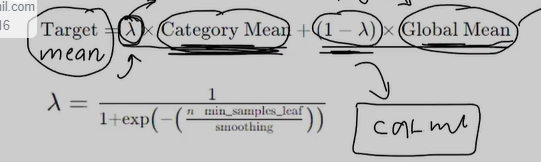

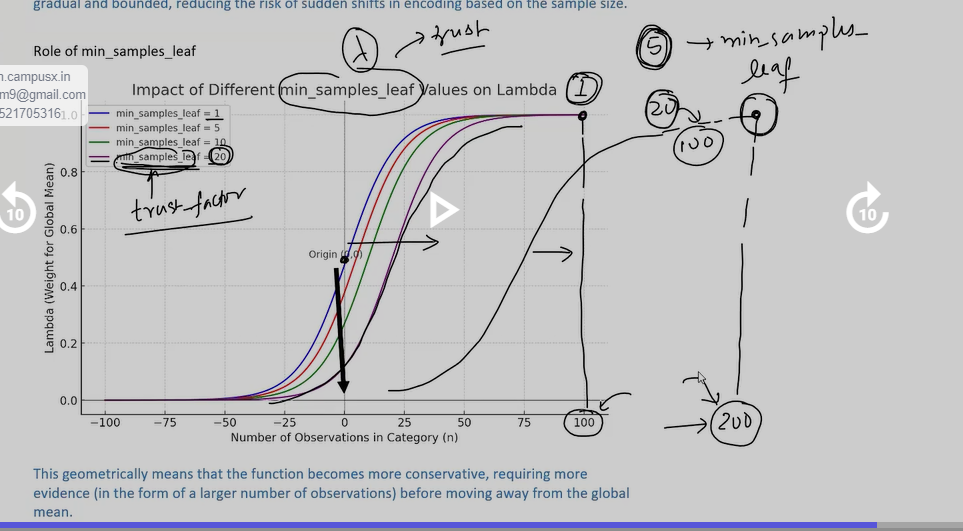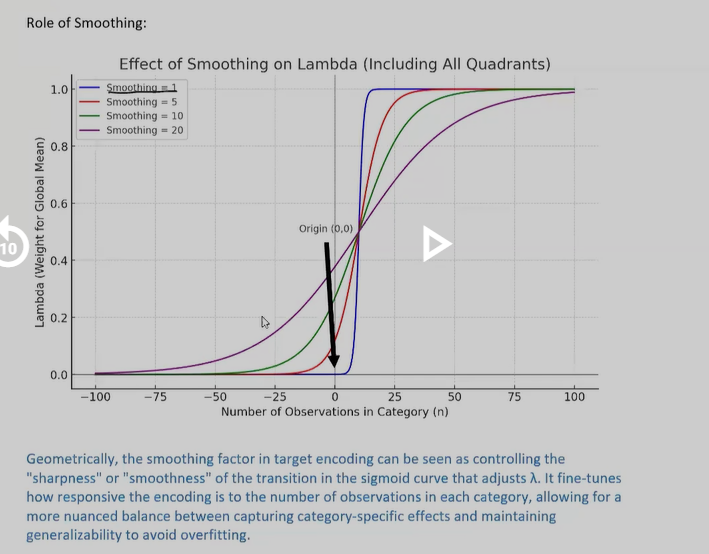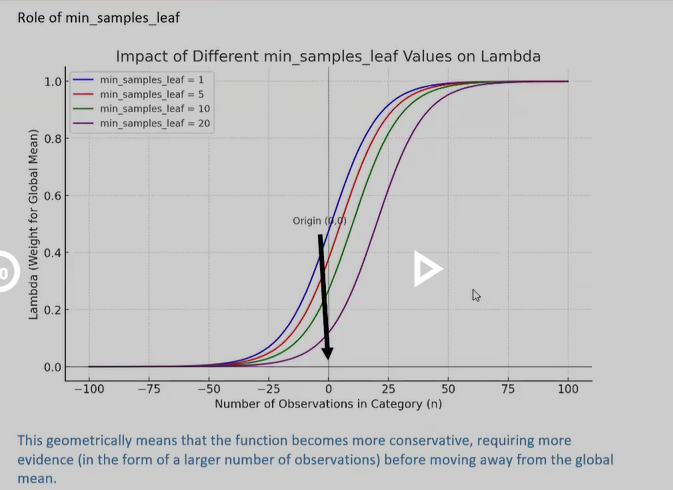

### Smoothing
Target Encoder class evabe lamda define kora. Smoothing increase korle graph smooth hoy, abrupt jump hocche na. Er interpretation holo jokhon graph smooth na thake tokhon hoyto arbitrary kom number of row er jonno amra global mean ke gurutto dicchilam, olpo kicu row add kortei amra category mean ke beshi gurutto dicchi , arbitrary jump korchi global mean theke category mean er dike. Jokhon smoothing baraye dei tokhon ei arbitrary jump ta hoy na. Global theke category mean e jete besh kichu row add korte hoy. Upore graph tate dekha jacche 7-8 ta row er niche thakle lamdar value kom rakhchi, mane global ke gurutto dicchi, kintu 9-10 ta row holei lamda high hoye jacche and category mean ke gurutto dicchi, abrupt jump hocche. Olpo row add koratei jump hoye jay. Smoothing barale amon ta hoy na. Smoothing baralam mane holo amr aro beshi row chai lamda er value baranor jonno. Smoothing joto beshi hobe, toto beshi row lagbe lamda er value baire category mean ke gurutto dite.

### min sample leaf
Eta holo trust factor. Etar man joto barabo sigmoid graph toto dan dike jabe, mane row number barate hobe lamda increse jonno. Etar man joto beshi, toto beshi row lage lamba barate.

**Weight of Evidence**

In [30]:
import pandas as pd
import category_encoders as ce

# Example dataset
data = {
    'Feature': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'B', 'A', 'C'],
    'Target': [1, 0, 0, 1, 1, 0, 1, 0, 1, 0]
}
df = pd.DataFrame(data)

# Define the features and target
X = df[['Feature']]
y = df['Target']

# Initialize and fit the TargetEncoder
encoder = ce.WOEEncoder(cols=['Feature'])
X_encoded = encoder.fit_transform(X, y)

# Display the original and encoded data
df['Feature_Encoded'] = X_encoded
print(df)


  Feature  Target  Feature_Encoded
0       A       1         0.000000
1       B       0        -0.405465
2       A       0         0.000000
3       C       1         0.405465
4       B       1        -0.405465
5       A       0         0.000000
6       C       1         0.405465
7       B       0        -0.405465
8       A       1         0.000000
9       C       0         0.405465


Weight of evidence shudhu binary data tei kaj kore.
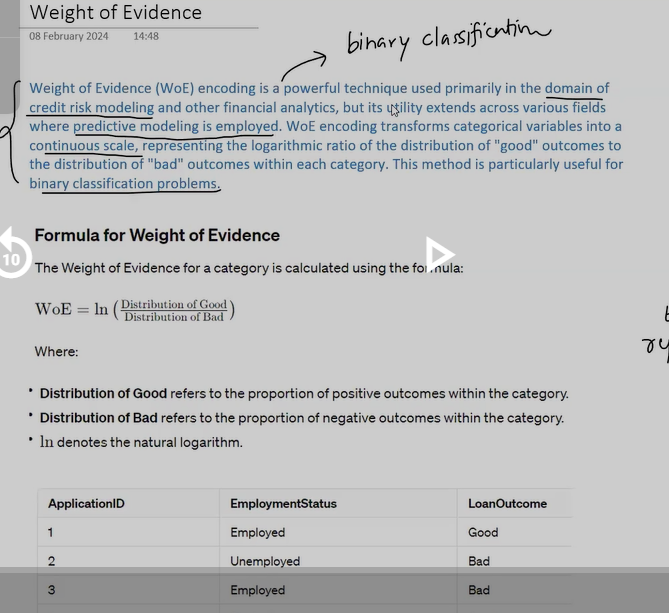

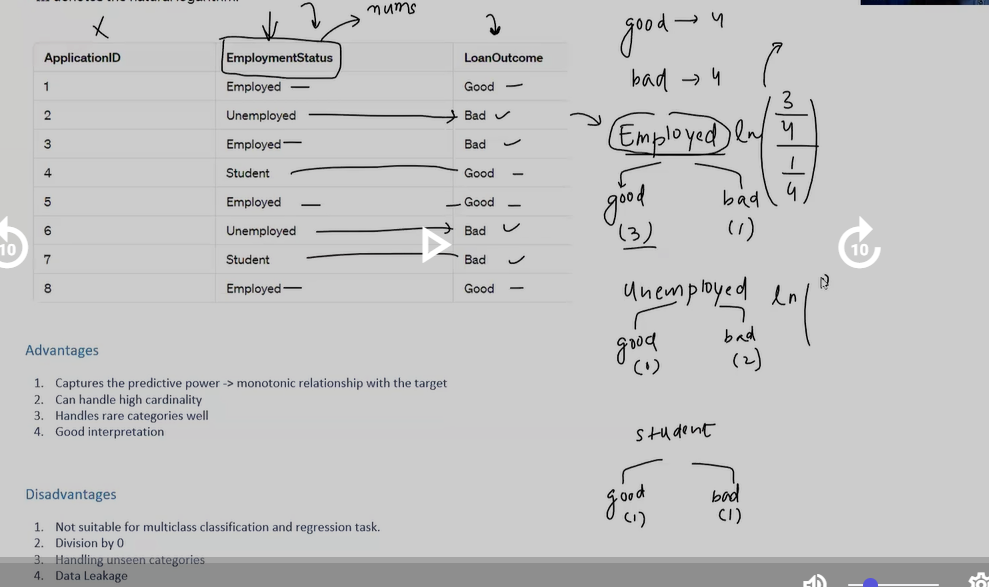



Total good ache 4 ta, total bad ache 4 ta. Prottek category er jonno oi category te good er shathe overall good er ratio / bad er shathe overall bad er ratio nibo. Niye ln nibo.